https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [17]:
import numpy as np
import pandas as pd

In [18]:
df = pd.read_csv('data/temps.csv')
df.head(15)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
5,2016,1,6,Wed,40,44,46.1,51,43,49,48,40
6,2016,1,7,Thurs,44,51,46.2,45,45,49,46,38
7,2016,1,8,Fri,51,45,46.3,48,43,47,46,34
8,2016,1,9,Sat,45,48,46.4,50,46,50,45,47
9,2016,1,10,Sun,48,50,46.5,52,45,48,48,49


### 2. Lidia con las variables categóricas del dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [20]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [21]:
# unicos
df['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [22]:
def encode_day_of_week(day_index, total_categories=7):
    angle = (2.0 * np.pi * day_index) / total_categories
    return np.sin(angle), np.cos(angle)

days_mapping = {'Mon': 0, 'Tues': 1, 'Wed': 2, 'Thurs': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}

df['week'] = df['week'].map(days_mapping)

def encode_day_of_week(day_index, total_categories=7):
    angle = (2.0 * np.pi * day_index) / total_categories
    return np.sin(angle), np.cos(angle)

df['sin_day'], df['cos_day'] = zip(*df['week'].apply(lambda x: encode_day_of_week(x)))

df['combined_day'] = np.arctan2(df['sin_day'], df['cos_day']) / (2.0 * np.pi) % 1.0

df.drop(['sin_day', 'cos_day'], axis=1, inplace=True)

df.rename(columns={'combined_day': 'week1'}, inplace=True)

df['week'] = df['week1']

df = df.drop(columns=['week1'])

In [23]:
df.head(15)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,0.571429,45,45,45.6,45,43,50,44,29
1,2016,1,2,0.714286,44,45,45.7,44,41,50,44,61
2,2016,1,3,0.857143,45,44,45.8,41,43,46,47,56
3,2016,1,4,0.000000,44,41,45.9,40,44,48,46,53
4,2016,1,5,0.142857,41,40,46.0,44,46,46,46,41
5,2016,1,6,0.285714,40,44,46.1,51,43,49,48,40
6,2016,1,7,0.428571,44,51,46.2,45,45,49,46,38
7,2016,1,8,0.571429,51,45,46.3,48,43,47,46,34
8,2016,1,9,0.714286,45,48,46.4,50,46,50,45,47
9,2016,1,10,0.857143,48,50,46.5,52,45,48,48,49


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    float64
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 32.8 KB


In [25]:
df.groupby('month', as_index=False)[['temp_1']].mean()

,month,temp_1
0,1,49.677419
1,2,54.115385
2,3,56.483871
3,4,66.433333
4,5,68.838710
5,6,73.233333
6,7,76.225806
7,8,77.947368
8,9,70.428571
9,10,63.900000


In [26]:
temp1x = df.groupby('month', as_index=False)[['temp_1']].mean()

In [27]:
temp1x

,month,temp_1
0,1,49.677419
1,2,54.115385
2,3,56.483871
3,4,66.433333
4,5,68.838710
5,6,73.233333
6,7,76.225806
7,8,77.947368
8,9,70.428571
9,10,63.900000


In [28]:
df = df.merge(temp1x, on='month')

In [29]:
# agrupar por mes y quedarse con la media de la columna temp_1


In [30]:
# merge del dataframe anterior con el original

c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and w

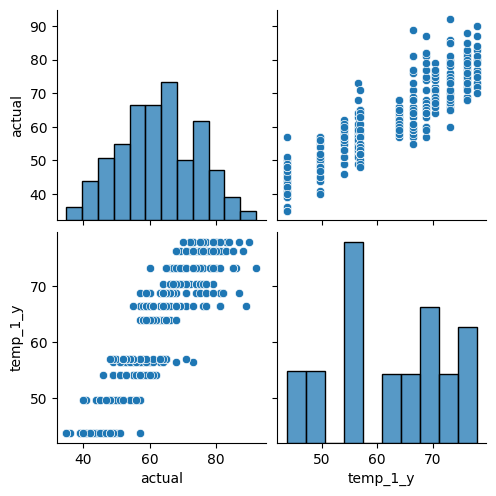

In [31]:
import seaborn as sns
sns.pairplot(df[['actual', 'temp_1_y']])

In [32]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=)

In [33]:
df

,year,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,2016,1,1,0.571429,45,45,45.6,45,43,50,44,29,49.677419
1,2016,1,2,0.714286,44,45,45.7,44,41,50,44,61,49.677419
2,2016,1,3,0.857143,45,44,45.8,41,43,46,47,56,49.677419
3,2016,1,4,0.000000,44,41,45.9,40,44,48,46,53,49.677419
4,2016,1,5,0.142857,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,0.142857,42,42,45.2,47,41,50,47,47,43.741935
344,2016,12,28,0.285714,42,47,45.3,48,41,49,44,58,43.741935
345,2016,12,29,0.428571,47,48,45.3,48,43,50,45,65,43.741935
346,2016,12,30,0.571429,48,48,45.4,57,44,46,44,42,43.741935


### 3. Divide en train y test

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['actual', 'year', 'day', 'week']), df['actual'], test_size=0.2, random_state=23)

In [35]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (278, 9)
X_test (70, 9)
y_train (278,)
y_test (70,)


### 4. Entrena el modelo


In [41]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor(random_state=73)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=73)

In [42]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [44]:
dtr.feature_importances_

array([0.01322226, 0.01872064, 0.20011526, 0.70119602, 0.01198299,
       0.01834897, 0.00835931, 0.02550166, 0.00255288])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [45]:
y_pred = dtr.predict(X_test)
y_pred

array([75., 70., 59., 51., 66., 57., 77., 58., 55., 88., 53., 52., 89.,
       50., 67., 68., 62., 67., 65., 55., 54., 81., 53., 67., 72., 75.,
       63., 78., 58., 63., 75., 44., 89., 49., 78., 46., 47., 51., 52.,
       69., 79., 49., 68., 82., 71., 62., 70., 87., 62., 78., 54., 66.,
       60., 57., 77., 46., 49., 83., 66., 59., 71., 62., 50., 43., 67.,
       55., 78., 51., 73., 57.])

In [46]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.5658765996644977
MAE 5.328571428571428
MAPE 0.08814119385532272
MSE 51.07142857142857
RMSE 7.146427679017578


### 6. Representa el árbol de decision

In [48]:
import matplotlib.pyplot as plt

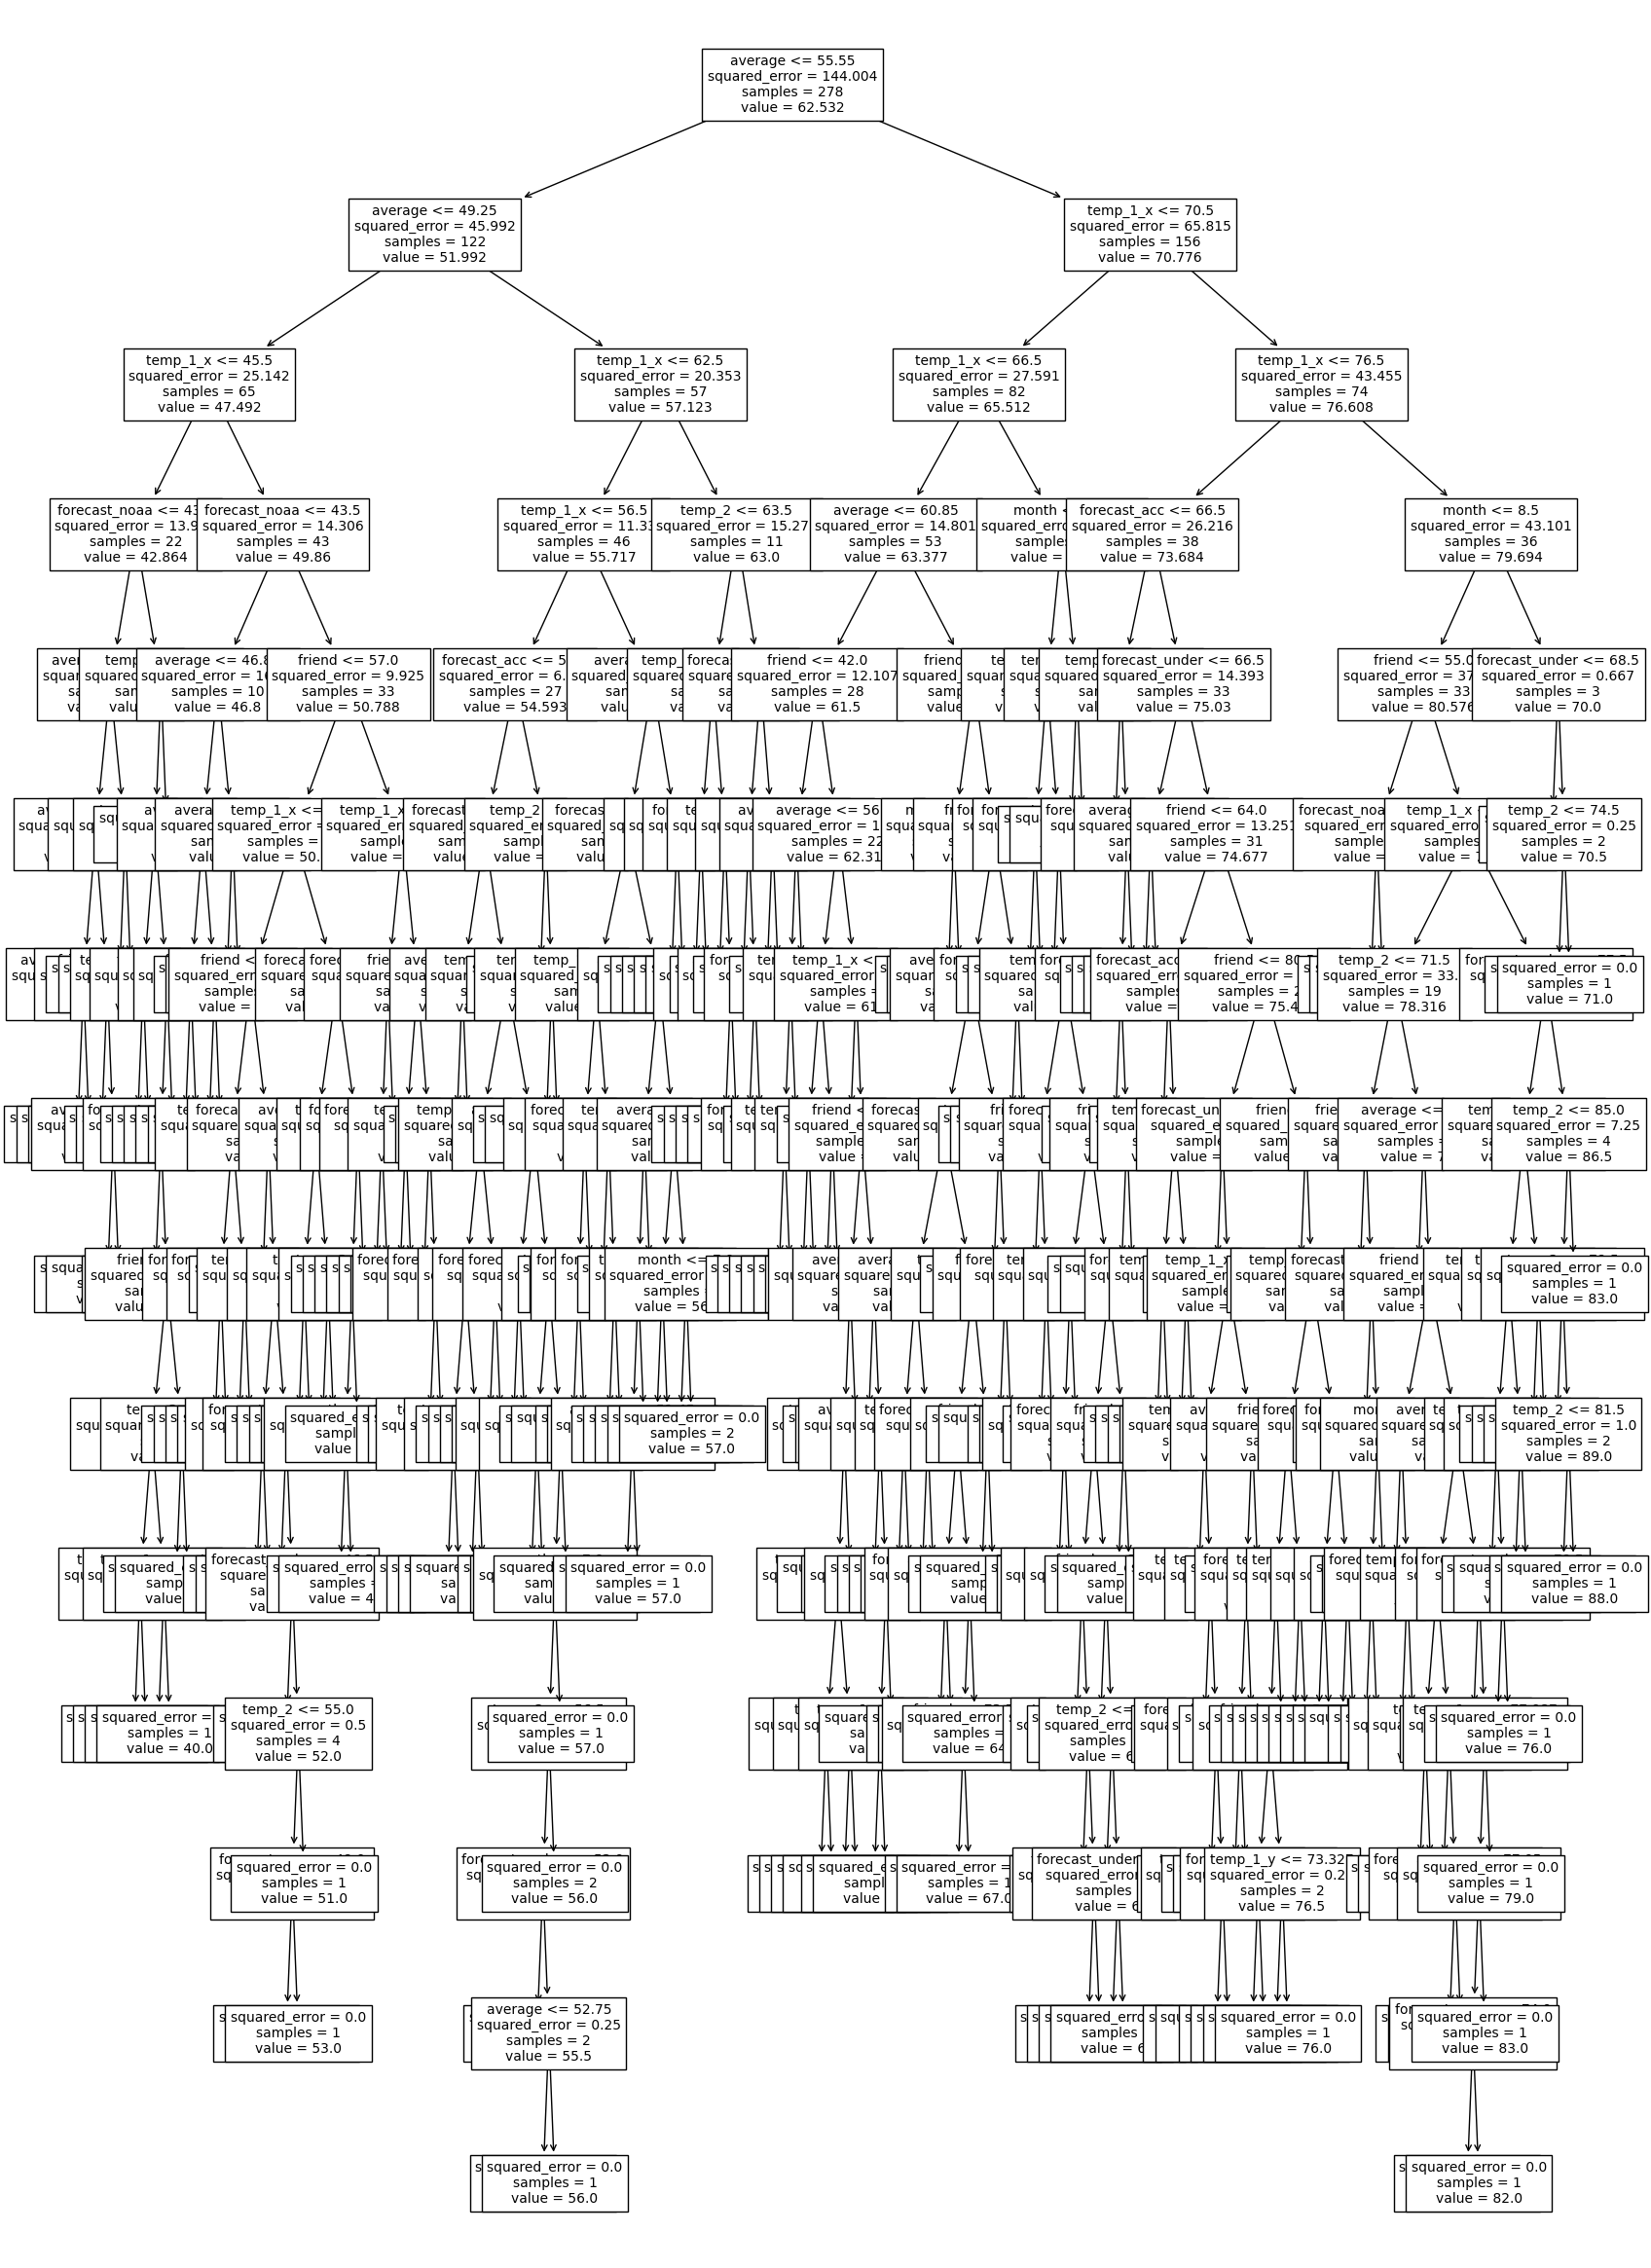

In [51]:
plt.figure(figsize=(20,30))
plot_tree(dtr, feature_names = X_train.columns, class_names = ['actual'], fontsize=10); #max_depth cambia la profundidad de la visualización

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [62]:
dtr3 = DecisionTreeRegressor(max_depth=3, random_state=73)
dtr3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=73)

### 8. Vuelve a evaluar tu modelo

In [63]:
y_pred = dtr3.predict(X_test)
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 9. Vuelve a representar su árbol

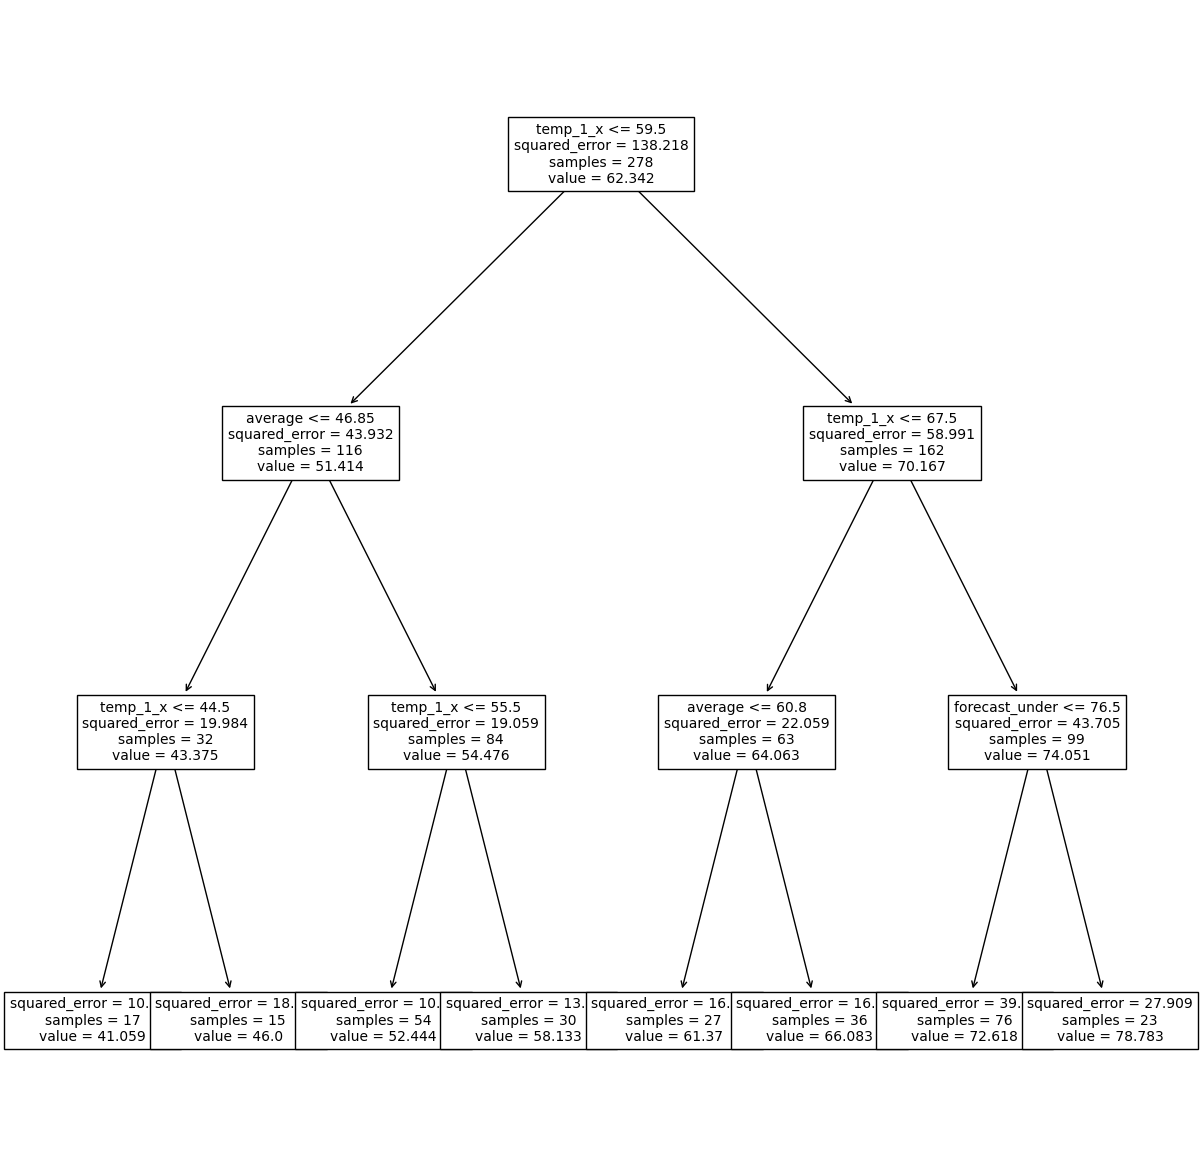

In [64]:
plt.figure(figsize=(15,15))

plot_tree(dtr3, feature_names = X_train.columns, class_names = ['actual'], fontsize=10); #max_depth cambia la profundidad de la visualización

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [56]:
dtr3.feature_importances_

array([0.        , 0.        , 0.21353439, 0.78646561, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [57]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [58]:
pd.DataFrame({'features':X_train.columns, 'importances':dtr3.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
3,average,0.786466
2,temp_1_x,0.213534
0,month,0.000000
1,temp_2,0.000000
4,forecast_noaa,0.000000
5,forecast_acc,0.000000
6,forecast_under,0.000000
7,friend,0.000000
8,temp_1_y,0.000000


In [65]:
X_train, X_test, y_train, y_test = train_test_split(df[['temp_1_x','average','forecast_under']], df['actual'], test_size=0.2, random_state=42)

In [66]:
dtr_3 = DecisionTreeRegressor(max_depth=3, random_state=73)
dtr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=73)

In [67]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

In [68]:
df['target_clas'] = np.where(df['actual']>59, 1, 0)
df[['actual', 'target_clas']].head()

,actual,target_clas
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0


In [75]:
df[['target_clas']].value_counts(normalize=True)

target_clas
1              0.586207
0              0.413793
Name: proportion, dtype: float64

c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

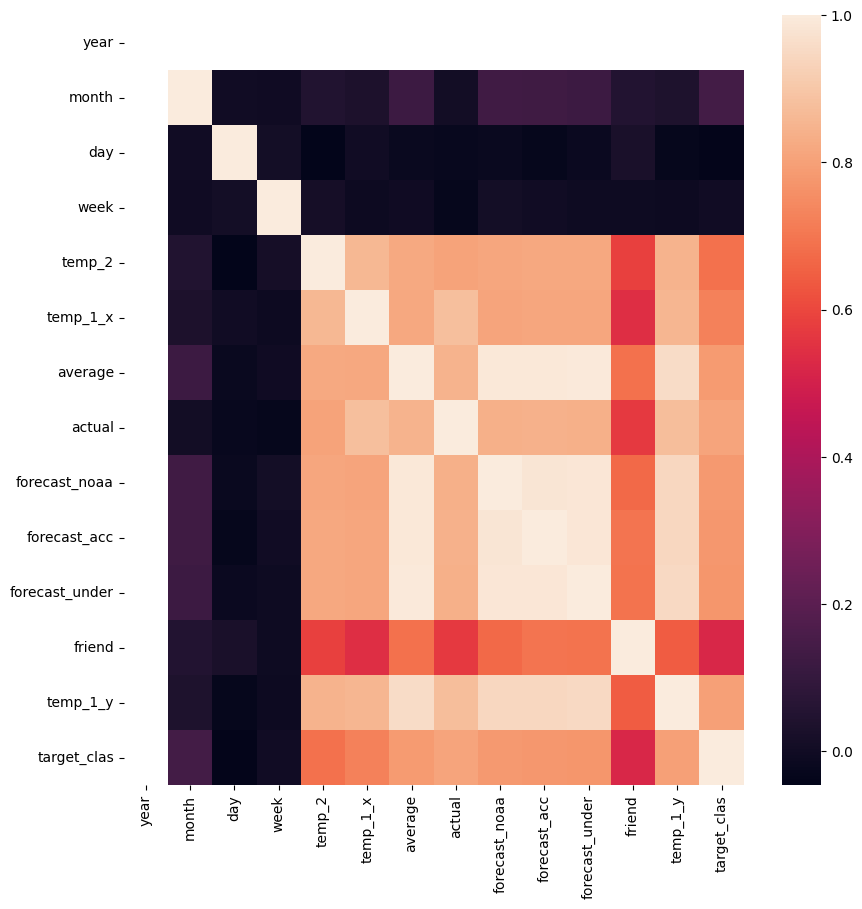

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [81]:
df['target_clas'].value_counts()

1    204
0    144
Name: target_clas, dtype: int64

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['year','day','week','actual','target_clas']), df['target_clas'], test_size=0.2, random_state=42)

In [78]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3, random_state=73)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=73)

In [79]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [93]:
dtc.feature_importances_

array([0.        , 0.        , 0.08751759, 0.83792502, 0.05793051,
       0.        , 0.01076818, 0.0058587 , 0.        ])

In [80]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,dtc.predict(X_test))

0.9

IndexError: list index out of range

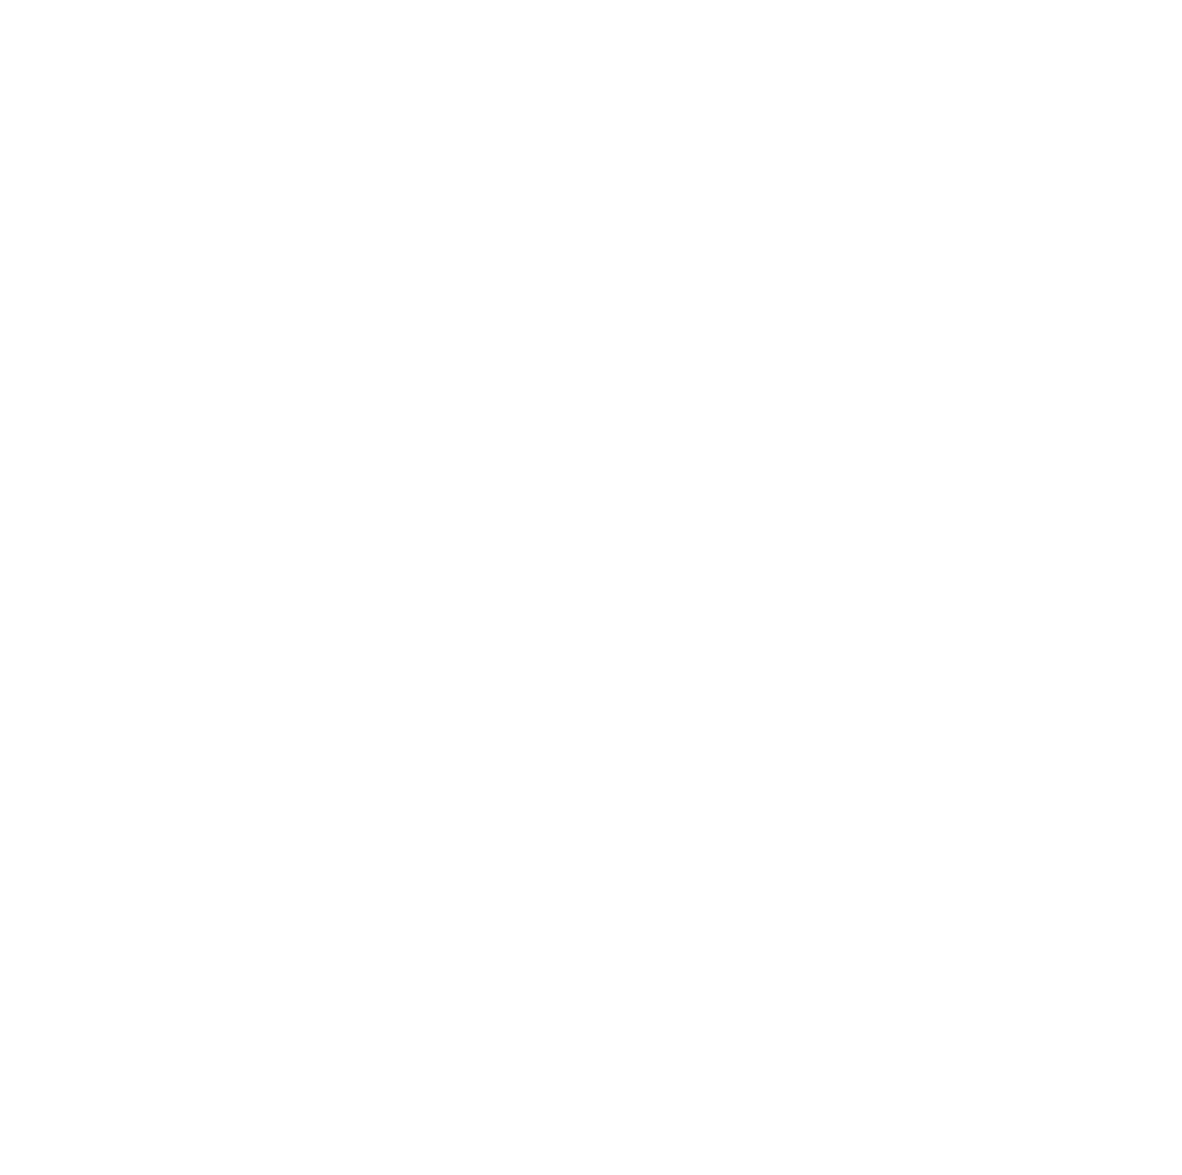

In [82]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = ['actual'], fontsize=10); #max_depth cambia la profundidad de la visualización

In [83]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

accuracy_score(y_test,lr.predict(X_test))

c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8142857142857143

c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

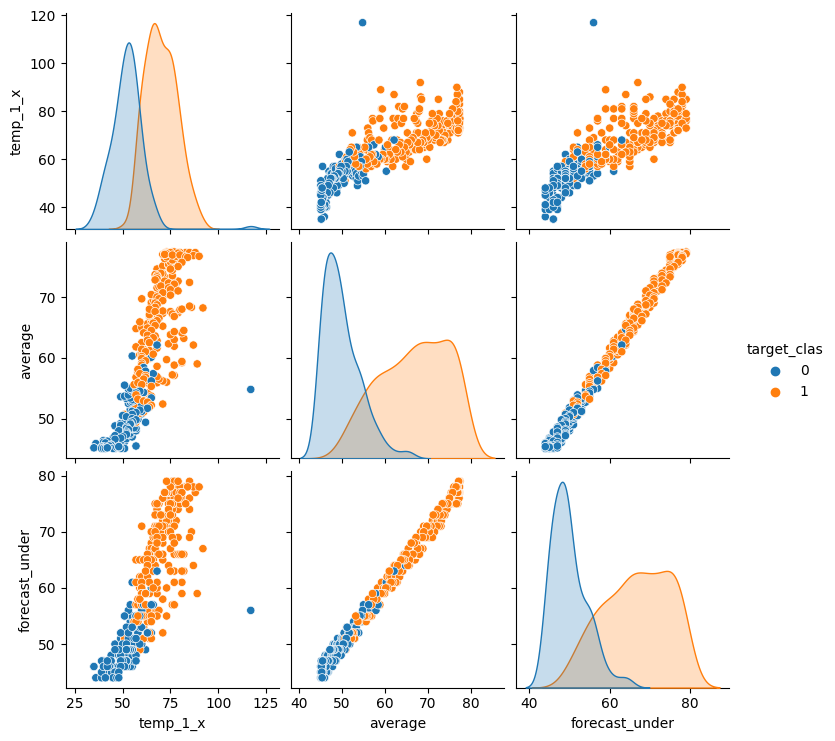

In [84]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')